#**Masked Face Recognition Using InceptionV3 and FaceNet**





In [2]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [3]:
cd drive/MyDrive/Live recognition/

/content/drive/MyDrive/Live recognition


In [4]:
ls

 1_pickling.ipynb             facenet_weights.h5
 2_training_using_cnn.ipynb   FacePic.jpg
 3_drowsy_predict.ipynb       final_V3_10k_model.h5
 database/                    KenaliWajahHaar.ipynb
 face_data.pkl               'Masked_Face_Recognition (1).ipynb'
 facenet.ipynb                photo.jpg
 Facenet.ipynb                photo_predict.jpg
 facenet_keras.h5             pic_database/
 facenet_model.json           pic_database.pkl
 facenet-real-time.py         test/


In [5]:
#Insatalling MTCNN

In [6]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 38.2 MB/s 


In [7]:
#Importing all libraries
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from imutils import paths
import numpy as np
import argparse
import os

In [8]:
from os import listdir
from PIL import Image
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import tensorflow as tf

import pickle
import cv2
from mtcnn.mtcnn import MTCNN

In [9]:
#Loading Haarcascade File
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


In [2]:
#if missing facenet.keras.h5 run this command
!wget "https://drive.google.com/file/d/1971Xk5RwedbudGgTIrGAL4F7Aifu7id1/view?usp=sharing"

--2021-07-21 07:10:22--  https://drive.google.com/file/d/1971Xk5RwedbudGgTIrGAL4F7Aifu7id1/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.23.101, 74.125.23.113, 74.125.23.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  65.53K  --.-KB/s    in 0.1s    

2021-07-21 07:10:22 (480 KB/s) - ‘view?usp=sharing’ saved [67100]



In [10]:
#Loading FaceNet model for Face Recogntion
MyFaceNet = load_model("facenet_keras.h5")

In [ ]:
listdir("pic_database/")

In [11]:
# if pkl files for encoding not present then generate the embeddings for the images present in the database

folder='pic_database/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)
    
    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
    
    if len(wajah)>0:
        x1, y1, width, height = wajah[0]         
    else:
        x1, y1, width, height = 1, 1, 10, 10
        
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Image.fromarray(gbr)                  
    gbr_array = asarray(gbr)
    
    face = gbr_array[y1:y2, x1:x2]                        
    
    face = Image.fromarray(face)                       
    face = face.resize((160,160))
    face = asarray(face)
    
    face = face.astype('float32')
    mean, std = face.mean(), face.std()
    face = (face - mean) / std
    
    face = expand_dims(face, axis=0)
    signature = MyFaceNet.predict(face)
    
    database[os.path.splitext(filename)[0]]=signature

Cause: could not parse the source code of <function <lambda> at 0x7fda5d662b90>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fda5d662b90>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fda5d662dd0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fda5d662dd0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fda5d662ef0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could no

In [12]:
#To view the face embeddings of images in database
database

{'Abhay': array([[ 1.0040630e+00,  8.5630214e-01,  2.7027214e-01, -1.0006456e+00,
          3.9566013e-01,  1.1137092e+00,  2.1566434e-01, -1.2077769e+00,
         -6.6731721e-01,  1.3535259e+00, -1.7876792e-01, -5.9059858e-01,
         -1.5352457e+00, -1.6111951e+00,  1.2761304e-01,  1.3320819e+00,
          1.1561219e+00, -5.6190014e-01,  1.0049191e+00, -1.3105612e+00,
         -3.3109707e-01,  1.4891056e+00,  4.6986066e-02, -2.0477045e-01,
         -1.8681412e+00, -4.6626234e-01, -3.3200964e-01, -4.0799215e-01,
         -4.2721695e-01,  7.0518655e-01, -2.5698535e-02, -4.1348958e-01,
          3.6218170e-02,  5.3841257e-01,  3.6018546e+00,  5.0556260e-01,
         -1.9513172e-01,  1.2474587e+00,  3.1488650e+00, -6.9567990e-01,
         -1.3914845e+00, -1.3769776e+00, -1.8659738e+00,  1.8271226e-01,
          7.5787231e-02, -1.1666088e+00, -1.2831779e+00, -4.6181545e-01,
          5.1956165e-01,  4.0110293e-01, -3.5618246e-03, -2.1455917e-01,
          4.2414993e-01, -3.0238539e-01,  

In [13]:
# if facenet_recognition not present
# mkdir facenet_recognition
myfile = open("/content/drive/MyDrive/Live recognition/pic_database.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

In [12]:
#Load the pkl file if embeddings are already stored in database 
myfile = open("/content/drive/MyDrive/Live recognition/pic_database.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [13]:
#Load InceptionV3 model trained for Face mask detection
model_path ="/content/drive/MyDrive/Live recognition/final_V3_10k_model.h5"
modell = load_model(model_path)

In [14]:
#Run this command to convert js to image
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [15]:
#Command to save the captured image 
def savingcapture(data):
  gbr1 = js_to_image(data)

  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)
  
  return filename  

In [16]:
#Function to detect the weather mask is present on face of the person
def predict_wear(filename):
    data = []
    imagePath = filename
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
    data = np.array(data, dtype="float32")
    var = modell.predict(data, batch_size=1)
    label  = np.argmax( var , axis = 1)

    
    if(label == 0):
      #print('With-Mask')
      return "With-Mask"
    else:
      #print('Without-Mask')
      return "Without-Mask"

In [17]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

In [18]:
#Function to call other functions involved in face mask detection(extract face and predict face)
def call_maskcheck(fname):
  # load the photo and extract the face
  pixels = extract_face(fname)
  # plot the extracted face
  #pyplot.imshow(pixels)
  # show the plot
  #pyplot.show()
  pyplot.imsave("FacePic.jpg", pixels)
  #function call for image prediction
  filename = "FacePic.jpg"
  return predict_wear(filename)

In [19]:
#Function which checks the mask state
def findmaskedfaces(fname):
  mask_state = call_maskcheck(fname)
  #print(mask_state)
  if (mask_state == "With-Mask"):
    print('With-Mask')
    filename=findFaces(fname)
    return filename
  else:
    print('Without-Mask')
    filename1=findnomaskfaces(fname)
    return filename1

In [55]:
#Function which recognises the masked person
def findFaces(fname):
  # gbr1 = js_to_image(data)
  gbr1 = cv2.imread(fname)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Image.fromarray(gbr)                 
  gbr_array = asarray(gbr)
 
  classifier = HaarCascade.detectMultiScale(gbr1,1.1,4)
  
  for (x1,y1,w,h) in classifier:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h
    
      face = gbr_array[y1:y2, x1:x2]                        
    
      face = Image.fromarray(face)                       
      face = face.resize((160,160))
      face = asarray(face)
    
      face = face.astype('float32')
      mean, std = face.mean(), face.std()
      face = (face - mean) / std
    
      face = expand_dims(face, axis=0)
      signature = MyFaceNet.predict(face)
    
      min_dist=100
      
      for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
          min_dist = dist
          identity = key
      identity = identity.split()[0]
      identity = identity + "_WITH-MASK"
      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_COMPLEX, 0.60, (0, 255, 0), 1, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)
    
  filename='photo_predict.jpg'
  cv2.imwrite(filename, gbr1)
  
  return filename  

In [52]:
#Function which labels non masked images
def findnomaskfaces(fname):
  # gbr1 = js_to_image(data)
  gbr1 = cv2.imread(fname)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Image.fromarray(gbr)                 
  gbr_array = asarray(gbr)
 
  classifier = HaarCascade.detectMultiScale(gbr1,1.1,4)
  
  for (x1,y1,w,h) in classifier:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h
    
      face = gbr_array[y1:y2, x1:x2]                        
    
      face = Image.fromarray(face)                       
      face = face.resize((160,160))
      face = asarray(face)
    
      face = face.astype('float32')
      mean, std = face.mean(), face.std()
      face = (face - mean) / std
    
      face = expand_dims(face, axis=0)
    
      identity = "WITHOUT-MASK"
      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_COMPLEX, 0.60, (0, 0, 255), 2, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,0,255), 2)
    
  filename='photo_predict.jpg'
  cv2.imwrite(filename, gbr1)
  
  return filename  

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  
  filename=savingcapture(data)

  return filename

ModuleNotFoundError: No module named 'google.colab'

<IPython.core.display.Javascript object>

Saved to photo.jpg


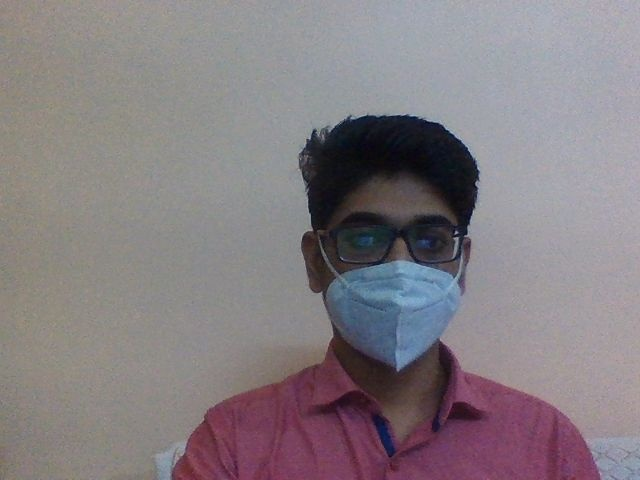

In [101]:
from IPython.display import Image as ImageDis
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(ImageDis(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

With-Mask


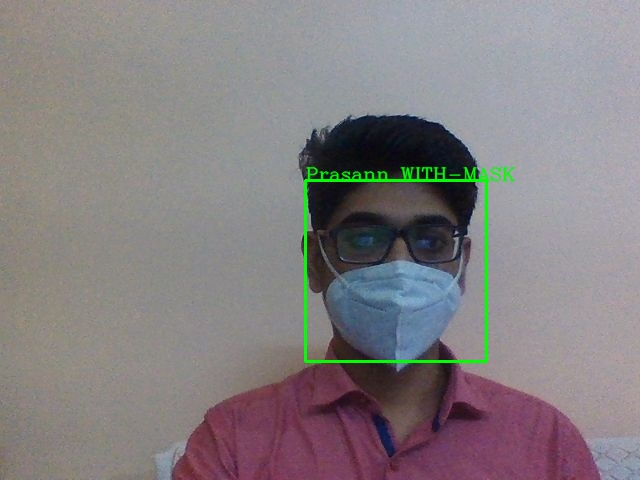

In [102]:
from IPython.display import Image as ImageDis
filename = "photo.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

<IPython.core.display.Javascript object>

Saved to photo.jpg


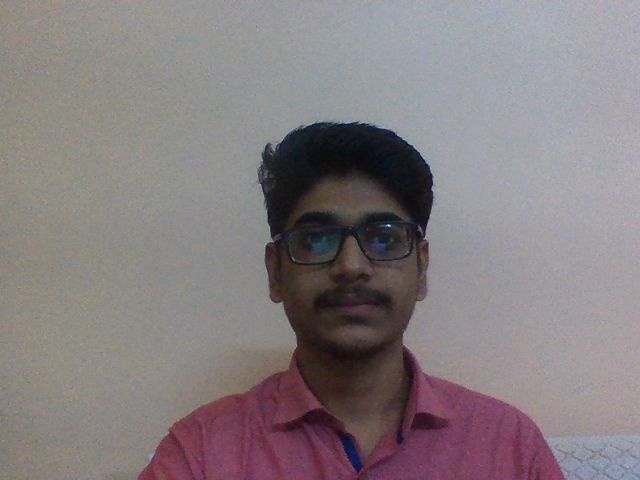

In [113]:
from IPython.display import Image as ImageDis
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(ImageDis(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Without-Mask


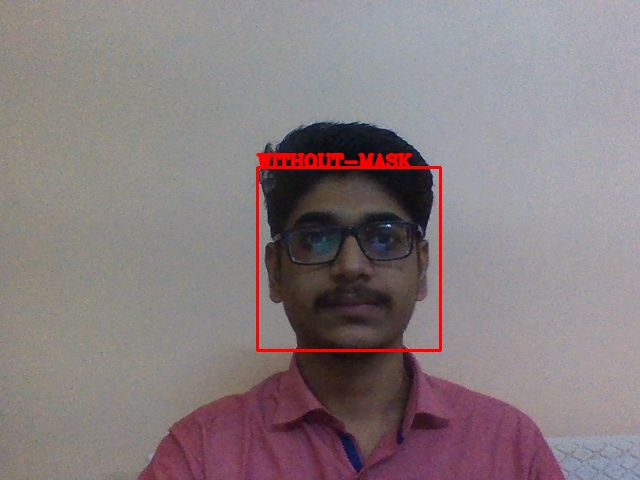

In [114]:
from IPython.display import Image as ImageDis
filename = "photo.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

With-Mask


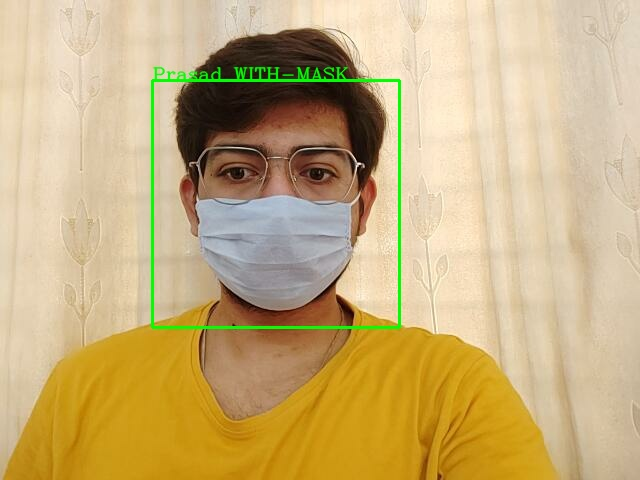

In [91]:
from IPython.display import Image as ImageDis
filename = "test/Prasad.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

With-Mask


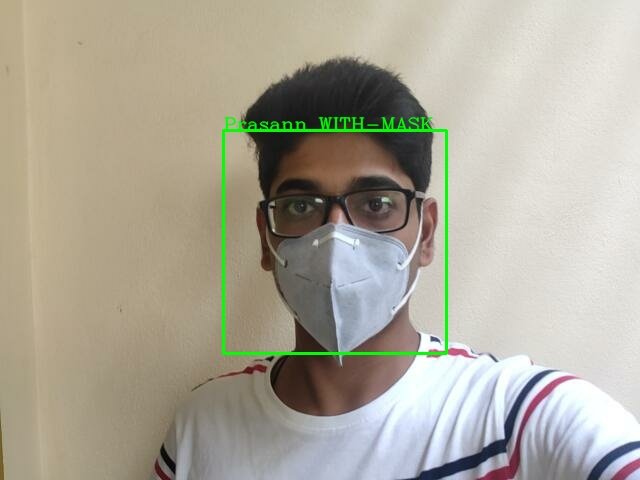

In [92]:
from IPython.display import Image as ImageDis
filename = "test/Prasann.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

With-Mask


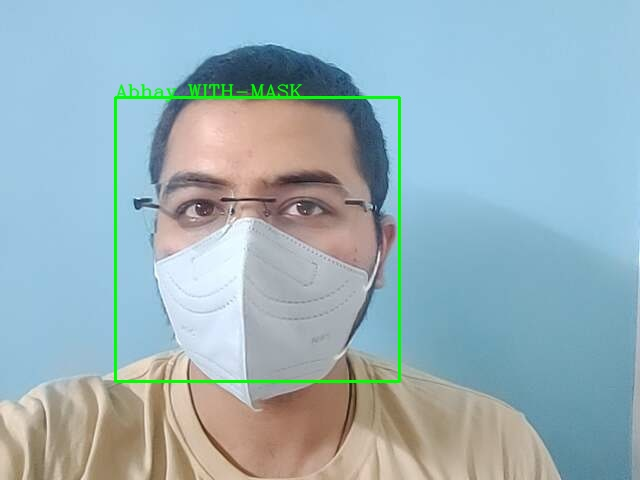

In [93]:
from IPython.display import Image as ImageDis
filename = "test/Abhay.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

With-Mask


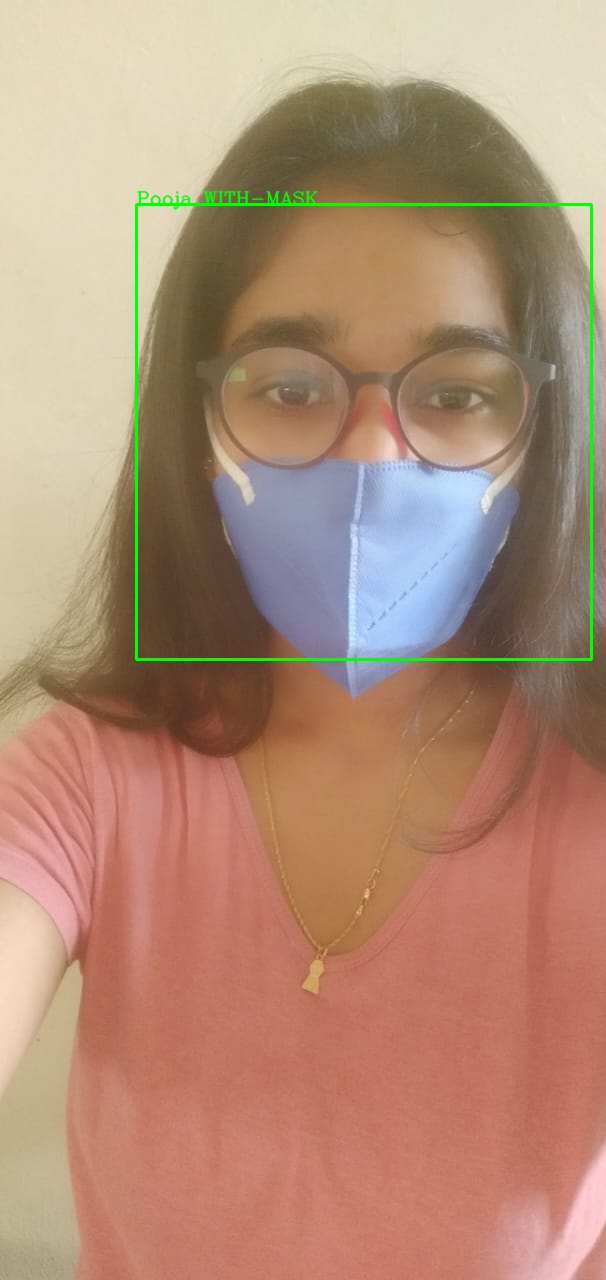

In [78]:
from IPython.display import Image as ImageDis
filename = "test/pooja with.jpeg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

With-Mask


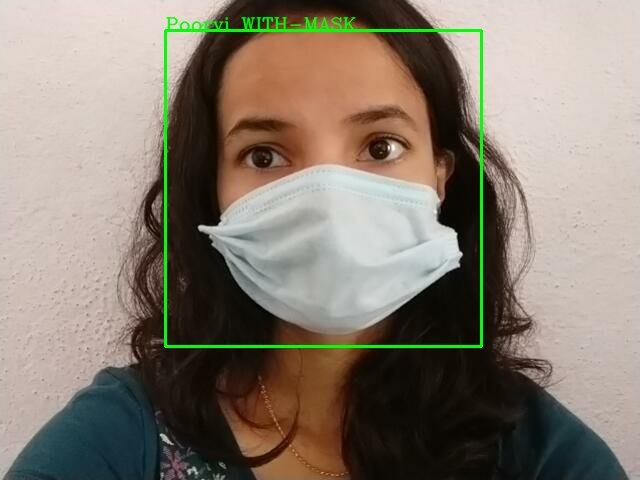

In [95]:
from IPython.display import Image as ImageDis
filename = "test/Poorvi.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

With-Mask


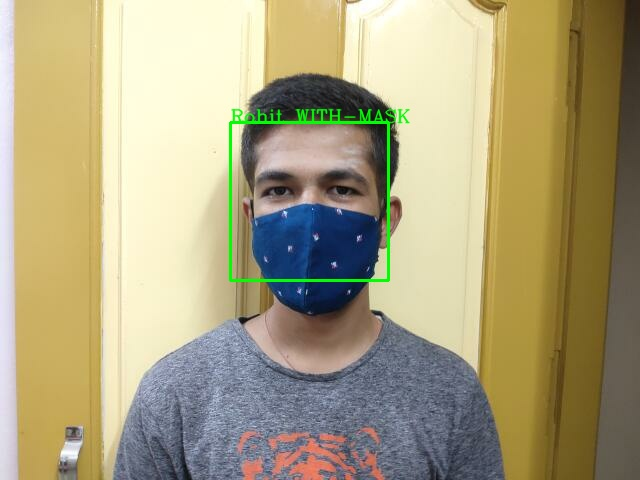

In [96]:
from IPython.display import Image as ImageDis
filename = "test/Rohit.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

Without-Mask


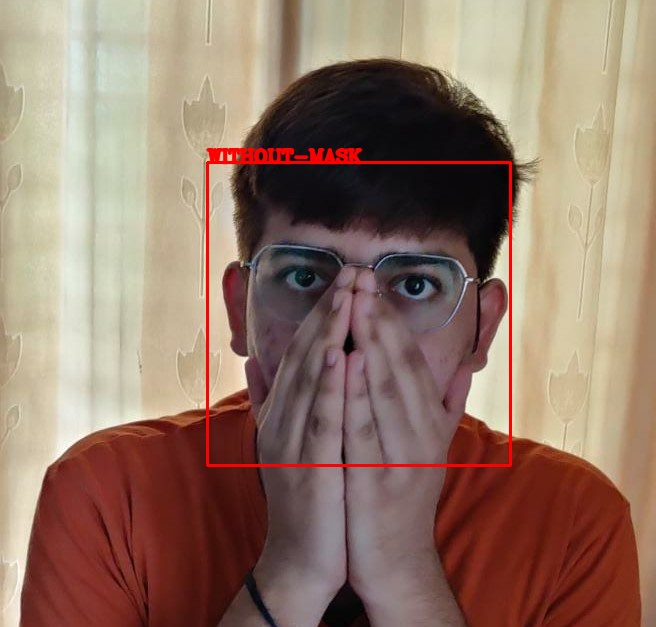

In [53]:
from IPython.display import Image as ImageDis
filename = "test/test.jpeg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

Without-Mask


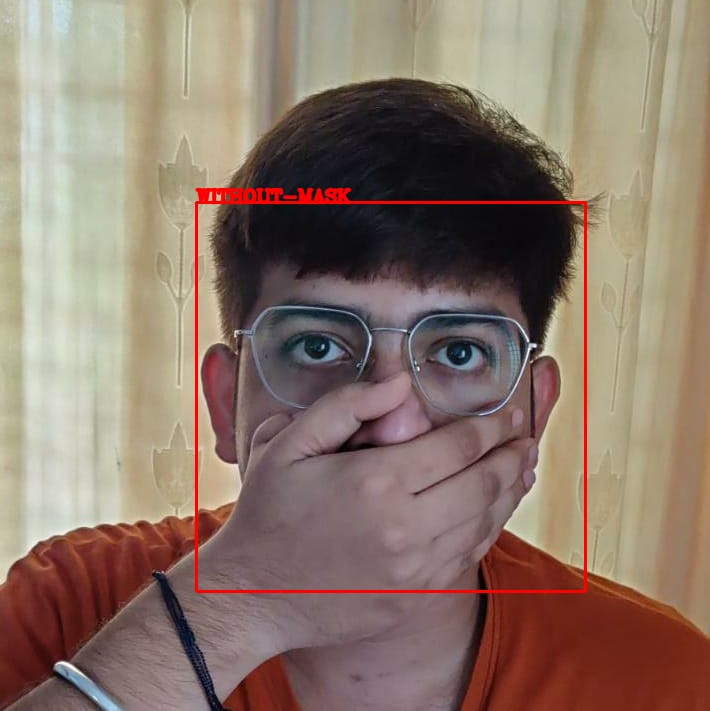

In [54]:
from IPython.display import Image as ImageDis
filename = "test/testme.jpeg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

With-Mask


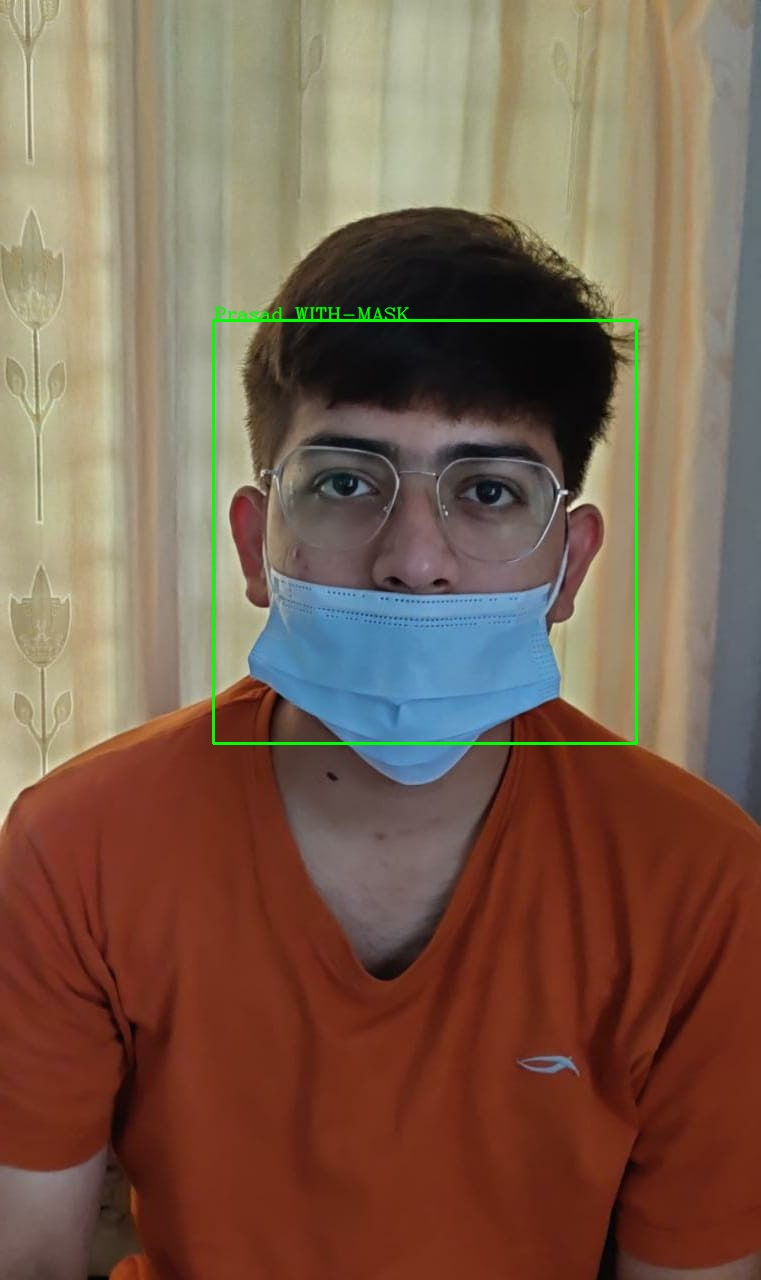

In [62]:
from IPython.display import Image as ImageDis
filename = "test/test1.jpeg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

Without-Mask


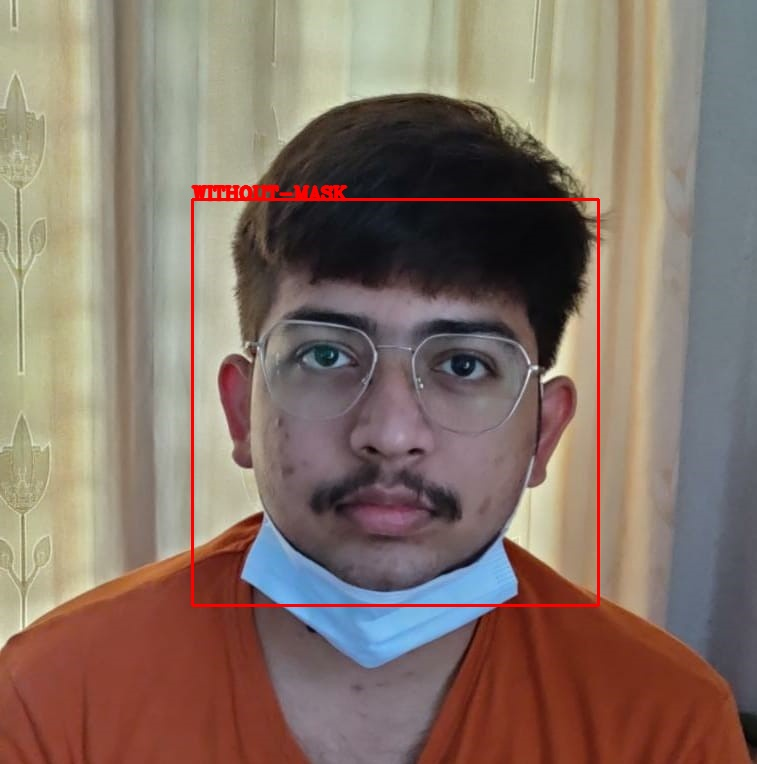

In [63]:
from IPython.display import Image as ImageDis
filename = "test/semi.jpeg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

Without-Mask


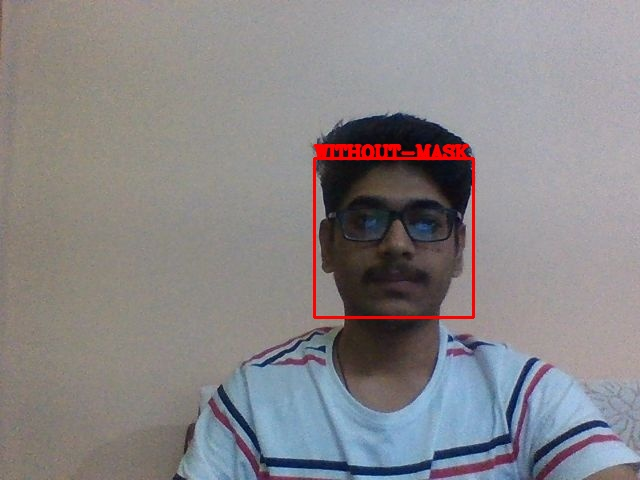

In [64]:
from IPython.display import Image as ImageDis
filename = "test/without_mask_photo.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

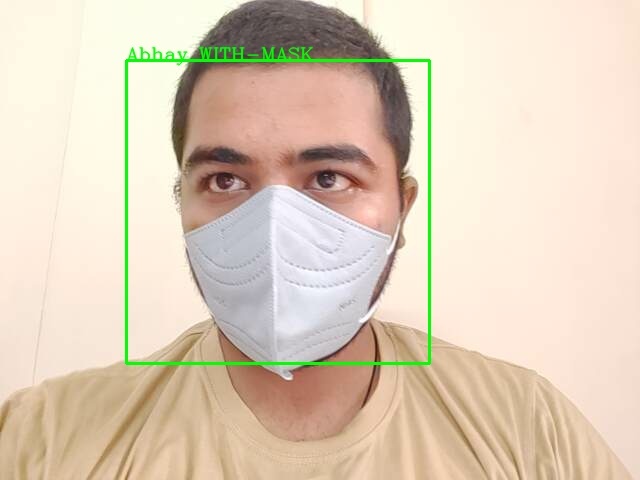

In [72]:
from IPython.display import Image as ImageDis
filename = "test/Abh2.png"
filename = findFaces(filename)
display(ImageDis(filename))

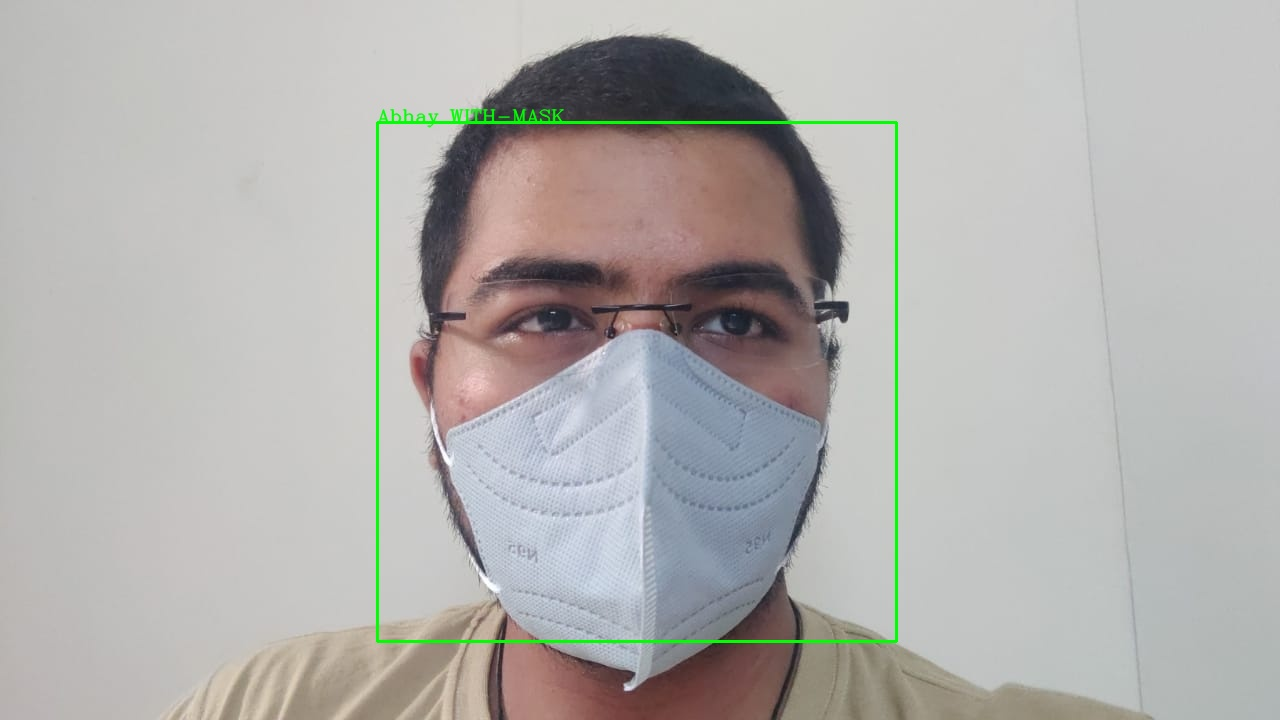

In [94]:
from IPython.display import Image as ImageDis
filename = "test/Abh1.jpg"
filename = findFaces(filename)
display(ImageDis(filename))

Without-Mask


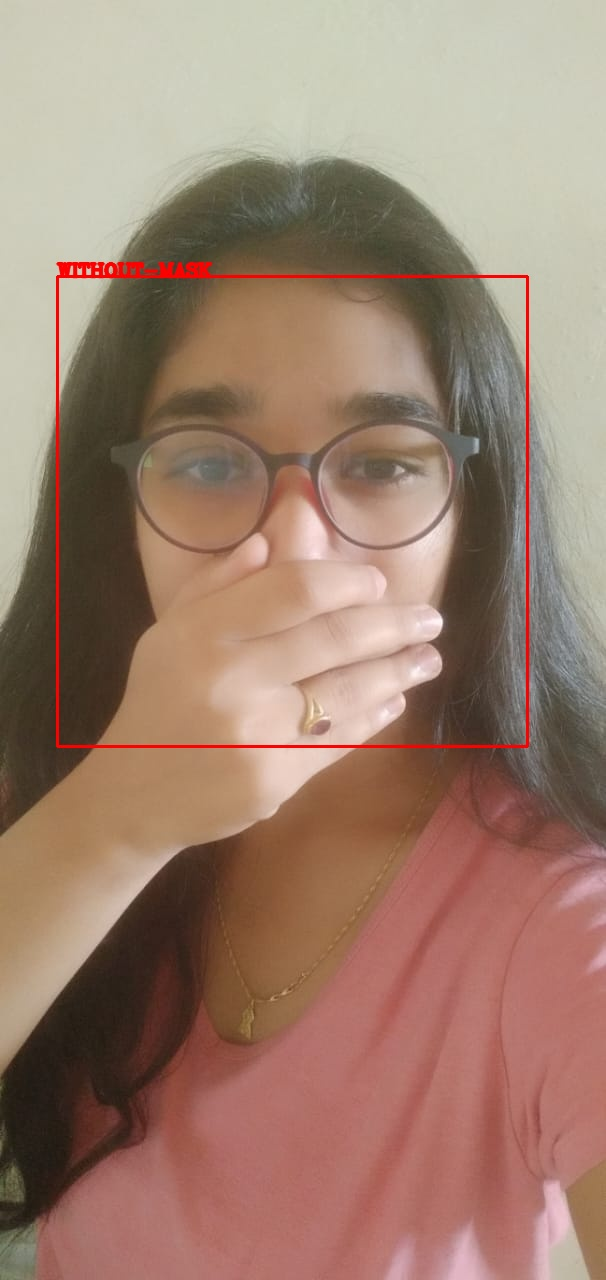

In [80]:
from IPython.display import Image as ImageDis
filename = "test/pooja.jpeg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

Without-Mask


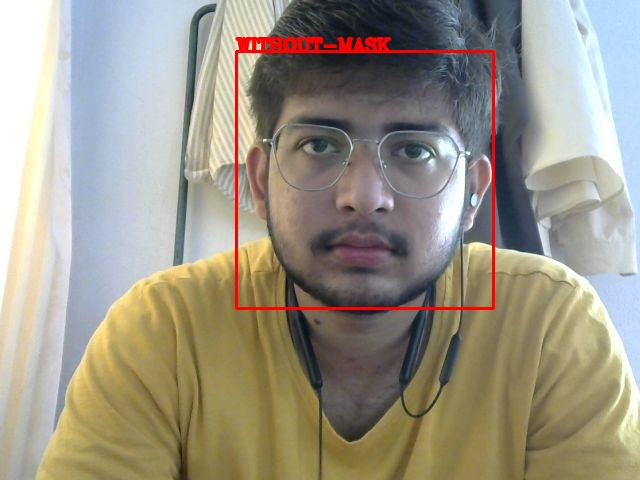

In [90]:
from IPython.display import Image as ImageDis
filename = "test/prasad2.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

Without-Mask


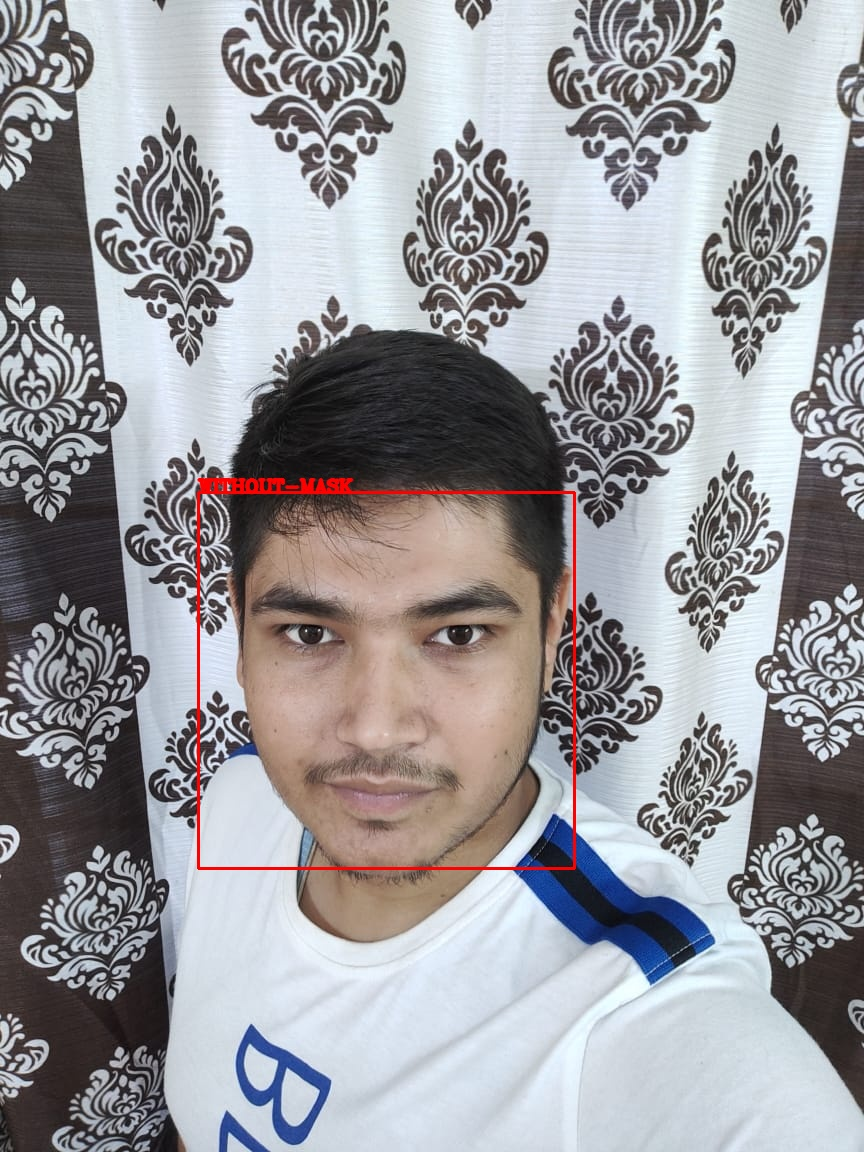

In [82]:
from IPython.display import Image as ImageDis
filename = "test/prash1.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))

With-Mask


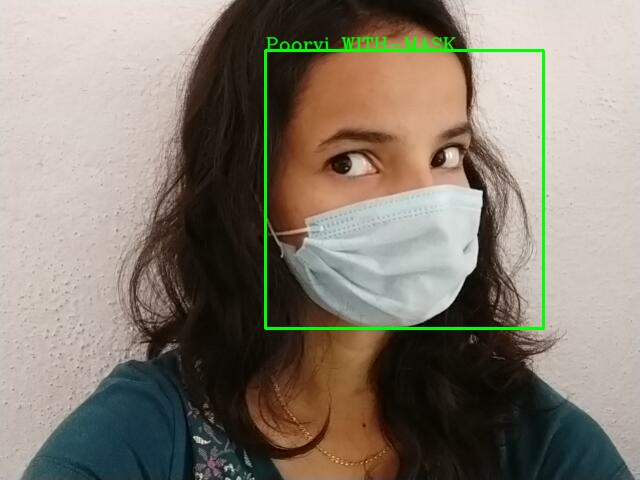

In [85]:
from IPython.display import Image as ImageDis
filename = "test/poorve.jpg"
filename = findmaskedfaces(filename)
display(ImageDis(filename))